<a href="https://colab.research.google.com/github/Hadeedullah/Heart_disease_detection/blob/master/heart_attack_prediction_(project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project on analysis and prediction of heart attacks using dataset from kaggle containing 12 independent health markers.  

importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('datasets_737503_1278636_heart.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Exploratory data analysis.

checking to see null values

In [ ]:
df.isnull().sum() #no null values found so no imputation is required

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

finding out data types of variables

In [ ]:
df.info() #categorical variables must be converted to object data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


converting categorical variables to object data type from int

In [ ]:
df = df.astype({'sex':'object','cp':'object','fbs':'object','restecg':'object','exang':'object','slope':'object','ca':'object','thal':'object','target':'object'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 33.3+ KB


In [ ]:
df.describe() #to view any anomolies in the data set

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


# feature selection

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
X = df[{'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'}]  #creating a dataframe with only independent variables

In [ ]:
X

,age,sex,ca,trestbps,chol,exang,thal,fbs,oldpeak,restecg,slope,cp,thalach
0,63,1,0,145,233,0,1,1,2.3,0,0,3,150
1,37,1,0,130,250,0,2,0,3.5,1,0,2,187
2,41,0,0,130,204,0,2,0,1.4,0,2,1,172
3,56,1,0,120,236,0,2,0,0.8,1,2,1,178
4,57,0,0,120,354,1,2,0,0.6,1,2,0,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,3,0,0.2,1,1,0,123
299,45,1,0,110,264,0,3,0,1.2,1,1,3,132
300,68,1,2,144,193,0,3,1,3.4,1,1,0,141
301,57,1,1,130,131,1,3,0,1.2,1,1,0,115


In [ ]:
y = pd.DataFrame(df.target).astype('int64') #creating dataframe with target variable

In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
feat = SelectKBest(score_func= chi2, k = 'all') #using SelectKBest feature to score variables using chi square test

In [ ]:
prob = feat.fit(X,y)

In [ ]:
prob

SelectKBest(k='all', score_func=<function chi2 at 0x000001A90B305288>)

In [ ]:
final = prob.transform(X)

In [ ]:
dfscores = pd.DataFrame(prob.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,age,23.286624
1,sex,7.576835
2,ca,66.440765
3,trestbps,14.823925
4,chol,23.936394
5,exang,38.914377
6,thal,5.791853
7,fbs,0.202934
8,oldpeak,72.644253
9,restecg,2.978271


In [ ]:
featureScores.sort_values('Score',ascending=False) #arranging dataframe featureScores in descending order

,Specs,Score
12,thalach,188.320472
8,oldpeak,72.644253
2,ca,66.440765
11,cp,62.598098
5,exang,38.914377
4,chol,23.936394
0,age,23.286624
3,trestbps,14.823925
10,slope,9.804095
1,sex,7.576835


# train and test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [ ]:
X_train.shape

(227, 13)

In [ ]:
X_test.shape

(76, 13)

In [ ]:
y_train.shape

(227, 1)

In [ ]:
y_test.shape

(76, 1)

# Machine learning using Random forest classifier

In [ ]:
clf = RandomForestClassifier(n_estimators=1000) #random forest classifier using 1000 trees.
fit = clf.fit(X_train,y_train)
ypred = fit.predict(X_test)

C:\Users\hadee\anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, ypred)) #accuracy of model

Accuracy: 0.8289473684210527


without feature selection the random forest classifier gives us a model accuracy of 82.9%.

In [ ]:
X_train1 = X_train.drop(columns = ['thal','fbs','restecg']) #removing 3 features with lowest chi2 score.

In [ ]:
X_test1 = X_test.drop(columns = ['thal','fbs','restecg'])

refitting the model in our modified data

In [ ]:
fit1 = clf.fit(X_train1,y_train)
ypred1 = fit.predict(X_test1)

C:\Users\hadee\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, ypred1)) #accuracy of model with less features 

Accuracy: 0.868421052631579


with feature selection our models accuracy increased to 86.84% which is an improvement over our previous result

In [ ]:
confusion_matrix(y_test,ypred1) #confusion matrix

array([[30,  5],
       [ 5, 36]], dtype=int64)

# Modifying data to fit Logistic Regression model

applying logistic regression model to see if we get a better accuracy.

In [ ]:
X

,age,sex,ca,trestbps,chol,exang,thal,fbs,oldpeak,restecg,slope,cp,thalach
0,63,1,0,145,233,0,1,1,2.3,0,0,3,150
1,37,1,0,130,250,0,2,0,3.5,1,0,2,187
2,41,0,0,130,204,0,2,0,1.4,0,2,1,172
3,56,1,0,120,236,0,2,0,0.8,1,2,1,178
4,57,0,0,120,354,1,2,0,0.6,1,2,0,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,3,0,0.2,1,1,0,123
299,45,1,0,110,264,0,3,0,1.2,1,1,3,132
300,68,1,2,144,193,0,3,1,3.4,1,1,0,141
301,57,1,1,130,131,1,3,0,1.2,1,1,0,115


In [ ]:
Xn = X.drop(columns = ['ca','cp','exang','sex','slope','thal','fbs','restecg']) 
#dropping categorical and low chi2 score variables

In [ ]:
Xn

,age,trestbps,chol,oldpeak,thalach
0,63,145,233,2.3,150
1,37,130,250,3.5,187
2,41,130,204,1.4,172
3,56,120,236,0.8,178
4,57,120,354,0.6,163
...,...,...,...,...,...
298,57,140,241,0.2,123
299,45,110,264,1.2,132
300,68,144,193,3.4,141
301,57,130,131,1.2,115


In [ ]:
Xc = X.drop(columns = ['trestbps','age','oldpeak','chol','thalach','fbs','thal','restecg'])
#dropping numeric and low chi2 score variables

In [ ]:
Xc

,sex,ca,exang,slope,cp
0,1,0,0,0,3
1,1,0,0,0,2
2,0,0,0,2,1
3,1,0,0,2,1
4,0,0,1,2,0
...,...,...,...,...,...
298,0,0,1,1,0
299,1,0,0,1,3
300,1,2,0,1,0
301,1,1,1,1,0


In [ ]:
Xn = pd.DataFrame(scaling.fit_transform(Xn)) #standardization of numeric variables

In [ ]:
Xn

,0,1,2,3,4
0,0.952197,0.763956,-0.256334,1.087338,0.015443
1,-1.915313,-0.092738,0.072199,2.122573,1.633471
2,-1.474158,-0.092738,-0.816773,0.310912,0.977514
3,0.180175,-0.663867,-0.198357,-0.206705,1.239897
4,0.290464,-0.663867,2.082050,-0.379244,0.583939
...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-0.724323,-1.165281
299,-1.033002,-1.234996,0.342756,0.138373,-0.771706
300,1.503641,0.706843,-1.029353,2.036303,-0.378132
301,0.290464,-0.092738,-2.227533,0.138373,-1.515125


In [ ]:
Xnew = pd.concat([Xc,Xn],axis=1) #combining standardized numeric values dataset to categorcial variable dataset

In [ ]:
Xnew

,sex,ca,exang,slope,cp,0,1,2,3,4
0,1,0,0,0,3,0.952197,0.763956,-0.256334,1.087338,0.015443
1,1,0,0,0,2,-1.915313,-0.092738,0.072199,2.122573,1.633471
2,0,0,0,2,1,-1.474158,-0.092738,-0.816773,0.310912,0.977514
3,1,0,0,2,1,0.180175,-0.663867,-0.198357,-0.206705,1.239897
4,0,0,1,2,0,0.290464,-0.663867,2.082050,-0.379244,0.583939
...,...,...,...,...,...,...,...,...,...,...
298,0,0,1,1,0,0.290464,0.478391,-0.101730,-0.724323,-1.165281
299,1,0,0,1,3,-1.033002,-1.234996,0.342756,0.138373,-0.771706
300,1,2,0,1,0,1.503641,0.706843,-1.029353,2.036303,-0.378132
301,1,1,1,1,0,0.290464,-0.092738,-2.227533,0.138373,-1.515125


In [ ]:
dummy = pd.get_dummies(Xnew, columns = ['ca','cp','exang','sex','slope']) 
#dummifying categorical variables

In [ ]:
dummy

,0,1,2,3,4,ca_0,ca_1,ca_2,ca_3,ca_4,...,cp_1,cp_2,cp_3,exang_0,exang_1,sex_0,sex_1,slope_0,slope_1,slope_2
0,0.952197,0.763956,-0.256334,1.087338,0.015443,1,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
1,-1.915313,-0.092738,0.072199,2.122573,1.633471,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
2,-1.474158,-0.092738,-0.816773,0.310912,0.977514,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,0.180175,-0.663867,-0.198357,-0.206705,1.239897,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
4,0.290464,-0.663867,2.082050,-0.379244,0.583939,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-0.724323,-1.165281,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
299,-1.033002,-1.234996,0.342756,0.138373,-0.771706,1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
300,1.503641,0.706843,-1.029353,2.036303,-0.378132,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
301,0.290464,-0.092738,-2.227533,0.138373,-1.515125,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [ ]:
X1 = dummy

In [ ]:
X1

,0,1,2,3,4,ca_0,ca_1,ca_2,ca_3,ca_4,...,cp_1,cp_2,cp_3,exang_0,exang_1,sex_0,sex_1,slope_0,slope_1,slope_2
0,0.952197,0.763956,-0.256334,1.087338,0.015443,1,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
1,-1.915313,-0.092738,0.072199,2.122573,1.633471,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
2,-1.474158,-0.092738,-0.816773,0.310912,0.977514,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,0.180175,-0.663867,-0.198357,-0.206705,1.239897,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
4,0.290464,-0.663867,2.082050,-0.379244,0.583939,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-0.724323,-1.165281,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
299,-1.033002,-1.234996,0.342756,0.138373,-0.771706,1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
300,1.503641,0.706843,-1.029353,2.036303,-0.378132,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
301,0.290464,-0.092738,-2.227533,0.138373,-1.515125,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [ ]:
X1 = X1.drop(columns = ['ca_4','cp_3','exang_1','sex_1','slope_2']) 
#dropping 1 dummy variable from each set to simplify data further

KeyError: "['ca_4' 'cp_3' 'exang_1' 'sex_1' 'slope_2'] not found in axis"

In [ ]:
X1

,0,1,2,3,4,ca_0,ca_1,ca_2,ca_3,cp_0,cp_1,cp_2,exang_0,sex_0,slope_0,slope_1
0,0.952197,0.763956,-0.256334,1.087338,0.015443,1,0,0,0,0,0,0,1,0,1,0
1,-1.915313,-0.092738,0.072199,2.122573,1.633471,1,0,0,0,0,0,1,1,0,1,0
2,-1.474158,-0.092738,-0.816773,0.310912,0.977514,1,0,0,0,0,1,0,1,1,0,0
3,0.180175,-0.663867,-0.198357,-0.206705,1.239897,1,0,0,0,0,1,0,1,0,0,0
4,0.290464,-0.663867,2.082050,-0.379244,0.583939,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-0.724323,-1.165281,1,0,0,0,1,0,0,0,1,0,1
299,-1.033002,-1.234996,0.342756,0.138373,-0.771706,1,0,0,0,0,0,0,1,0,0,1
300,1.503641,0.706843,-1.029353,2.036303,-0.378132,0,0,1,0,1,0,0,1,0,0,1
301,0.290464,-0.092738,-2.227533,0.138373,-1.515125,0,1,0,0,1,0,0,0,0,0,1


train test split

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y, test_size = 0.25, random_state = 42)

In [ ]:
X_train1.shape

(227, 16)

In [ ]:
X_test1.shape

(76, 16)

In [ ]:
y_train1.shape

(227, 1)

In [ ]:
y_test1.shape

(76, 1)

# Applying logistic regression

In [ ]:
logreg = LogisticRegression() 

In [ ]:
fit1 = logreg.fit(X_train1,y_train1)

C:\Users\hadee\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
ypred1 = fit1.predict(X_test1)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test1, ypred1)) #model accuracy

Accuracy:  0.8947368421052632


With logistic regression, the model accuracy is 89.47% which is higher than random forest classifiers accuracy.

In [ ]:
confusion_matrix(y_test1,ypred1) #confusion matrix

array([[31,  4],
       [ 4, 37]], dtype=int64)

In [ ]:
roc_auc_score(y_test1,ypred1) #roc score

0.8940766550522647

In [ ]:
prob = fit1.predict_proba(X_test1) 

In [ ]:
prob #probability values

array([[0.98571978, 0.01428022],
       [0.24837981, 0.75162019],
       [0.26247772, 0.73752228],
       [0.96135801, 0.03864199],
       [0.0801255 , 0.9198745 ],
       [0.07827182, 0.92172818],
       [0.44522828, 0.55477172],
       [0.98972063, 0.01027937],
       [0.99490071, 0.00509929],
       [0.48651808, 0.51348192],
       [0.52615646, 0.47384354],
       [0.66813396, 0.33186604],
       [0.10181875, 0.89818125],
       [0.90427112, 0.09572888],
       [0.01841055, 0.98158945],
       [0.04183612, 0.95816388],
       [0.03200833, 0.96799167],
       [0.95900467, 0.04099533],
       [0.9927735 , 0.0072265 ],
       [0.99458878, 0.00541122],
       [0.25324505, 0.74675495],
       [0.8527022 , 0.1472978 ],
       [0.73580141, 0.26419859],
       [0.28367538, 0.71632462],
       [0.31064269, 0.68935731],
       [0.25781138, 0.74218862],
       [0.111728  , 0.888272  ],
       [0.3869991 , 0.6130009 ],
       [0.95633071, 0.04366929],
       [0.05663367, 0.94336633],
       [0.

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test1, prob[:,1])

In [ ]:
fpr #false positive rate

array([0.        , 0.        , 0.        , 0.02857143, 0.02857143,
       0.05714286, 0.05714286, 0.08571429, 0.08571429, 0.11428571,
       0.11428571, 0.17142857, 0.17142857, 0.42857143, 0.42857143,
       0.71428571, 0.71428571, 1.        ])

In [ ]:
tpr #true positive rate

array([0.        , 0.02439024, 0.09756098, 0.09756098, 0.31707317,
       0.31707317, 0.56097561, 0.56097561, 0.63414634, 0.63414634,
       0.92682927, 0.92682927, 0.95121951, 0.95121951, 0.97560976,
       0.97560976, 1.        , 1.        ])

In [ ]:
thresholds

array([1.98158945, 0.98158945, 0.95816388, 0.95404784, 0.89522698,
       0.888272  , 0.77138194, 0.75162019, 0.74380125, 0.74218862,
       0.47384354, 0.39040845, 0.33186604, 0.09572888, 0.0928918 ,
       0.03243314, 0.02575768, 0.00509929])

In [ ]:
auc = roc_auc_score(y_test1, prob[:,1]) #Area under curve
print('AUC: %.3f' % auc)

AUC: 0.908


Text(0, 0.5, 'True Positive Rate')

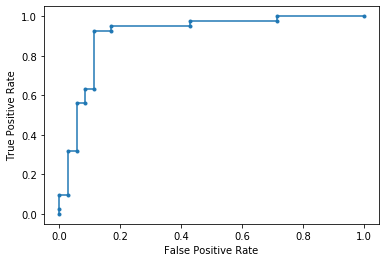

In [ ]:
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')                
#roc curve

In [ ]:
print(classification_report(y_test1,ypred1)) #performance metrics: precision, recall, f1score, accuracy. 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        35
           1       0.90      0.90      0.90        41

    accuracy                           0.89        76
   macro avg       0.89      0.89      0.89        76
weighted avg       0.89      0.89      0.89        76



# Conclusion

2 machine learning models were used to predict the target variable, namely Random forest classifier and Logistic regression. Out of the 2, Logistic regression model produced the best results with an accuracy score of 89.47%. All necessary performance metrics were also calculated and the model performance significantly improved.